## Data and Library load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Portofolio/shopify_intern

/content/drive/MyDrive/Portofolio/shopify_intern


In [ ]:
!ls

'2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv'
 question1.ipynb


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


## Dataset Information

In [ ]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
df.shape

(5000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [ ]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [ ]:
df.duplicated().sum() #no duplicate values

0

In [ ]:
df["order_id"].duplicated().sum() #no duplicate values

0

In [ ]:
info_dp=pd.DataFrame(df.dtypes,columns=['Data types'])
info_dp['missing']=df.isnull().sum()
info_dp['unique_vals']=df.nunique()
info_dp['count']=df.count()
info_dp#useful info

,Data types,missing,unique_vals,count
order_id,int64,0,5000,5000
shop_id,int64,0,100,5000
user_id,int64,0,301,5000
order_amount,int64,0,258,5000
total_items,int64,0,8,5000
payment_method,object,0,3,5000
created_at,object,0,4991,5000


we can see that we have no duplicate or missing values. We need to change the format of the "created at" column though. I will also create columns that contain only the date and tiem respectively that the order was made

In [ ]:
df['order_datetime'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d %H:%M:%S')
df["order_date"] = df['order_datetime'].dt.date
df["order_time"] = df['order_datetime'].dt.time
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_datetime,order_date,order_time
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03-13 12:36:56,2017-03-13,12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03-03 17:38:52,2017-03-03,17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56,2017-03-14 04:23:56,2017-03-14,04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03-26 12:43:37,2017-03-26,12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,2017-03-01 04:35:11,2017-03-01,04:35:11


In [ ]:
df.info()#check if conversion was correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   object        
 7   order_datetime  5000 non-null   datetime64[ns]
 8   order_date      5000 non-null   object        
 9   order_time      5000 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 390.8+ KB


lets double check the assumption made about AOV and 30 days span

In [ ]:
print("first date:",df["order_date"].min())
print("last date:",df["order_date"].max())

first date: 2017-03-01
last date: 2017-03-30


In [ ]:
print("AOV over a 30 days span:", (df["order_amount"].sum()/df.shape[0]))

AOV over a 30 days span: 3145.128


## Dataset exploration

we will explore some features individually

In [ ]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_datetime,order_date,order_time
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03-13 12:36:56,2017-03-13,12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03-03 17:38:52,2017-03-03,17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56,2017-03-14 04:23:56,2017-03-14,04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03-26 12:43:37,2017-03-26,12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,2017-03-01 04:35:11,2017-03-01,04:35:11


### shop_id - categorical value

In [ ]:
df["shop_id"].nunique()

100

In [ ]:
df["shop_id"].value_counts()

53    68
71    66
19    64
13    63
89    61
      ..
74    38
56    37
67    37
38    35
85    35
Name: shop_id, Length: 100, dtype: int64

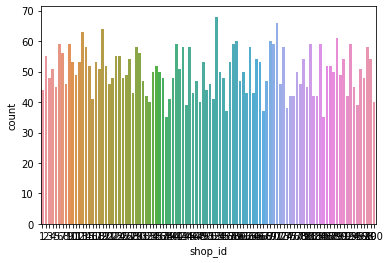

In [ ]:
sns.countplot(data=df,x="shop_id")

it doesn't look like we have a large imbalance between the orders between the shops

### total_items - discrete value 


In [ ]:
df["total_items"].nunique()

8

In [ ]:
df["total_items"].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

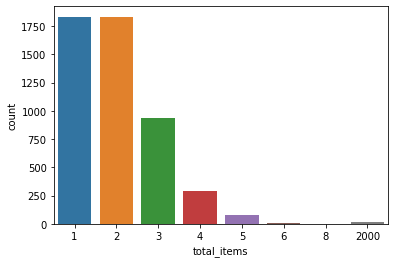

In [ ]:
sns.countplot(data=df,x="total_items")

We can see that the order quantity varies a lot. There are orders that consist of 2000 items/shoes which could be one of the reasons we have high order value

### AOV per total_item

In [ ]:
grouped = df.groupby('total_items').order_amount.agg(['sum', 'count'])
grouped["AOV"] = grouped["sum"]/grouped["count"]
grouped.sort_values(by="AOV",ascending=False)

,sum,count,AOV
total_items,,,
2000,11968000,17,704000.000000
6,161460,9,17940.000000
3,1120803,941,1191.076514
8,1064,1,1064.000000
4,277672,293,947.686007
5,58470,77,759.350649
2,1374394,1832,750.215066
1,763777,1830,417.364481


In [ ]:
mask1 = df["total_items"]==2000
mask2 = df["total_items"]==6
print(mask1.sum()+mask2.sum())

26


total items = 2000

In [ ]:
df.loc[mask1,"shop_id"].value_counts()

42    17
Name: shop_id, dtype: int64

In [ ]:
df.loc[mask1,"order_amount"]

15      704000
60      704000
520     704000
1104    704000
1362    704000
1436    704000
1562    704000
1602    704000
2153    704000
2297    704000
2835    704000
2969    704000
3332    704000
4056    704000
4646    704000
4868    704000
4882    704000
Name: order_amount, dtype: int64

the large amount of ordered items could explain the reason we are seeing a 704k order. This large amount is one of the reasons we are seeing skewed AOV

In [ ]:
df[mask1]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_datetime,order_date,order_time
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,2017-03-07 04:00:00,2017-03-07,04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,2017-03-04 04:00:00,2017-03-04,04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,2017-03-02 04:00:00,2017-03-02,04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,2017-03-24 04:00:00,2017-03-24,04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,2017-03-15 04:00:00,2017-03-15,04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,2017-03-11 04:00:00,2017-03-11,04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,2017-03-19 04:00:00,2017-03-19,04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,2017-03-17 04:00:00,2017-03-17,04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,2017-03-12 04:00:00,2017-03-12,04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,2017-03-07 04:00:00,2017-03-07,04:00:00


We can see this transaction occured very often which could mean it was either a mistake of the logging system or an order made by mistake. Also, it could be due to fraud

total items = 6

In [ ]:
df.loc[mask2,"shop_id"].value_counts()

78    1
91    1
83    1
61    1
67    1
43    1
68    1
86    1
13    1
Name: shop_id, dtype: int64

In [ ]:
df.loc[mask2,"order_amount"]

691     154350
1563       960
2127       774
2307       948
3252       786
3538      1086
3865       816
4711       780
4847       960
Name: order_amount, dtype: int64

we can see there is an order of roughly 155k which again leads to a skewed AOV

### order_amount - continuous 

#### all orders

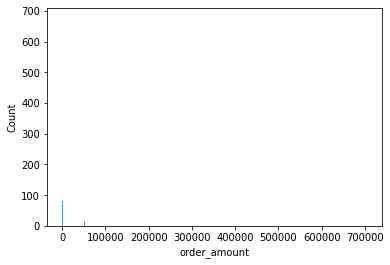

In [ ]:
sns.histplot(data=df,x="order_amount")

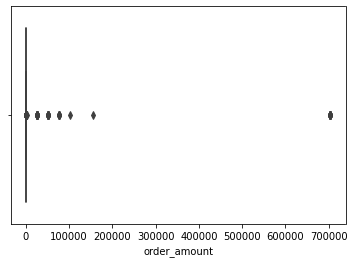

In [ ]:
sns.boxplot(data=df,x="order_amount")

We can see that we have orders of the same value which at the same time are very large, some of them even reach values higher than a million. This is probably the main reason that AOV is so high. We will explore more though

In [ ]:
mask = df["order_amount"]>5000 #lets filter the very large orders
mask.sum()#no orders higher than 5000

63

In [ ]:
df.loc[~mask,"order_amount"].sort_values(ascending=False)[:20]

1364    1760
1367    1408
1471    1408
3538    1086
4141    1064
2987    1056
938     1056
3513    1056
3077     980
2494     965
1563     960
4847     960
2307     948
3532     935
2560     935
1256     935
2039     920
3073     890
1150     885
879      885
Name: order_amount, dtype: int64

#### orders lower than 5000

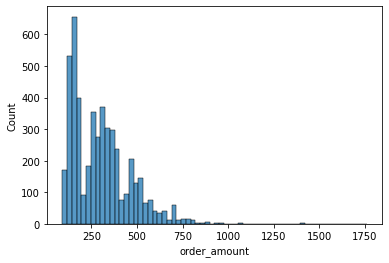

In [ ]:
sns.histplot(data=df[~mask],x="order_amount")

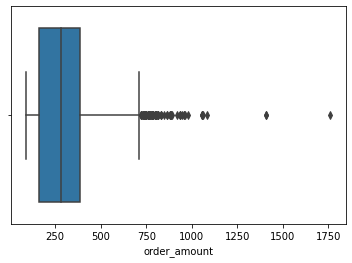

In [ ]:
sns.boxplot(data=df[~mask],x="order_amount")

#### orders higher than 5000

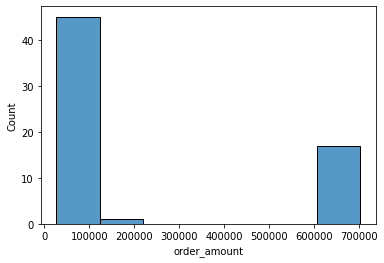

In [ ]:
sns.histplot(data=df[mask],x="order_amount")

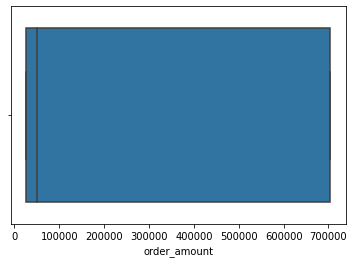

In [ ]:
sns.boxplot(data=df[mask],x="order_amount")#not very useful, but printed for summetry 

### AOV per shop

#### lets calculate the AOV per shop. Perhaps some shops sell more expensive shoes than the others.

In [ ]:
grouped = df.groupby('shop_id').order_amount.agg(['sum', 'count'])
grouped["AOV"] = grouped["sum"]/grouped["count"]
grouped.sort_values(by="AOV",ascending=False)

,sum,count,AOV
shop_id,,,
42,11990176,51,235101.490196
78,2263800,46,49213.043478
50,17756,44,403.545455
90,19758,49,403.224490
38,13680,35,390.857143
...,...,...,...
53,14560,68,214.117647
100,8547,40,213.675000
32,7979,42,189.976190


#### we can see those two shops have a significant higher AOV compared to the other two. Lets explore their sales a bit more


In [ ]:
mask1 = df["shop_id"] == 42
mask2 = df["shop_id"] == 78

print(mask1.sum()+mask2.sum())

97


#### shop 42

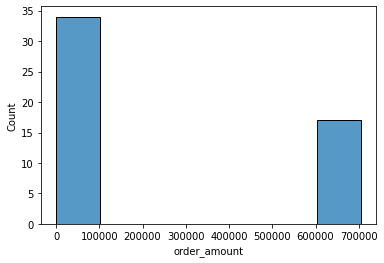

In [ ]:
sns.histplot(data=df[mask1],x="order_amount")

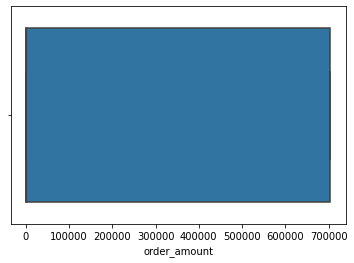

In [ ]:
sns.boxplot(data=df[mask1],x="order_amount")

In [ ]:
df.loc[mask1,"order_amount"].describe()

count        51.000000
mean     235101.490196
std      334860.641587
min         352.000000
25%         352.000000
50%         704.000000
75%      704000.000000
max      704000.000000
Name: order_amount, dtype: float64

In [ ]:
df.loc[mask1,"order_amount"].value_counts()

704000    17
352       15
704       13
1056       3
1408       2
1760       1
Name: order_amount, dtype: int64

As seen before the order of 704k are one of the reasons we are having skewed
data. 

Also, we could see previously that this transaction occured very often which could mean it was either a mistake of the logging system or an order made by mistake. Also, it could be due to fraud

#### shop 78

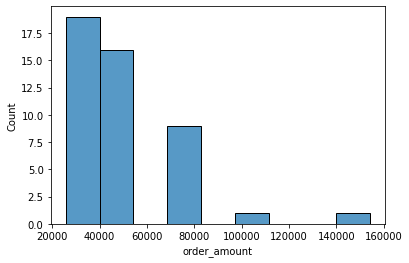

In [ ]:
sns.histplot(data=df[mask2],x="order_amount")

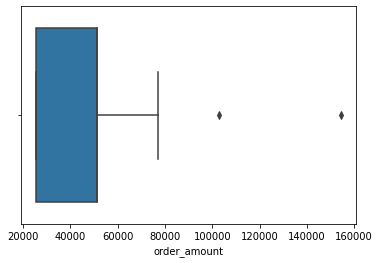

In [ ]:
sns.boxplot(data=df[mask2],x="order_amount")

In [ ]:
df.loc[mask2,"order_amount"].describe()

count        46.000000
mean      49213.043478
std       26472.227449
min       25725.000000
25%       25725.000000
50%       51450.000000
75%       51450.000000
max      154350.000000
Name: order_amount, dtype: float64

In [ ]:
df.loc[mask2,"total_items"].value_counts()

1    19
2    16
3     9
6     1
4     1
Name: total_items, dtype: int64

We can see shop78 orders are significantly more expensive than the rest ranging from 25k to roughly 80k, with some orders around 100k and 160k. All these lead to skewed AOV

In [ ]:
df[mask2]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_datetime,order_date,order_time
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,2017-03-12 05:56:57,2017-03-12,05:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,2017-03-26 17:08:19,2017-03-26,17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,2017-03-16 21:39:35,2017-03-16,21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,2017-03-09 07:23:14,2017-03-09,07:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,2017-03-18 11:18:42,2017-03-18,11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,2017-03-27 22:51:43,2017-03-27,22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,2017-03-15 10:16:45,2017-03-15,10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,2017-03-16 16:38:26,2017-03-16,16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,2017-03-17 22:32:21,2017-03-17,22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,2017-03-27 09:27:20,2017-03-27,09:27:20


orders are scattered throughout time unlike the orders of shop42

## Reason for high AOV

In [ ]:
print(mask2.sum() + 17) #mask2 represents the expensive orders of shop 78 and 17 represents the number of 704k worth orders of shop 42
mask.sum() #mask represents all the orders above 5k

63


63

We can see that we have discovered all the reasons that lead to a skewed AOV. Those are :

- We have 17 orders of 2000 items which cost 704k from shop 42. We can see this transaction occured very often which could mean it was a mistake either of the logging system or an order made by mistake. Also, it could be due to fraud

- We have 46 orders of shop 78 (also the total number of orders of that shop) which are significantly higher than the other orders. Apparently the shoes there must be really expensive since although the only sell 1-2 items in most cases the cost of the order is significantly high.


## Fixes and improvements

1 - We can use the median of order amount as our metric

In [ ]:
df["order_amount"].median()

284.0

2 - We can aggregate the data per shop and calculate the AOV per shop. Then we can calculate the median of those aggregated values

In [ ]:
grouped = df.groupby('shop_id').order_amount.agg(['sum', 'count'])
grouped["AOV"] = grouped["sum"]/grouped["count"]
grouped.sort_values(by="AOV",ascending=False)

,sum,count,AOV
shop_id,,,
42,11990176,51,235101.490196
78,2263800,46,49213.043478
50,17756,44,403.545455
90,19758,49,403.224490
38,13680,35,390.857143
...,...,...,...
53,14560,68,214.117647
100,8547,40,213.675000
32,7979,42,189.976190


In [ ]:
print("mean of AOV per shop",grouped["AOV"].mean())#we can see that even in this case mean AOV remains skewed
print("median of AOV per shop",grouped["AOV"].median())

mean of AOV per shop 3136.834087887025
median of AOV per shop 308.8897584973166


3 - Another approach would be to use a cutoff and drop all values above it and then calculate the AOV metric. In my opinion 5k would be a good cutoff value

In [ ]:
mask = df["order_amount"]<5000
aov_filtered = df.loc[mask,"order_amount"].sum()/df[mask].shape[0]
print("AOV value after filtering:",aov_filtered)

AOV value after filtering: 302.58051448247926


4 - We could also use median as a metric after filtering

In [ ]:
mask = df["order_amount"]<5000
aov_filtered = df.loc[mask,"order_amount"].median()
print("median of order amount after filtering:",aov_filtered)

median of order amount after filtering: 284.0


## Chosen evaluation metric 

My evaluation metric would mainly depend on the fact whether we are allowed to filter the data(perhaps maybe due to a regulation we aren't allowed). In both cases both metrics can deal with outliers (not affected by them)

1 - With filtering: AOV, value: 302.58$

2 - Without filtering: Median of order amount(order_amount column), value: 284.0$